# Reading in the data

In [49]:
# Import the Python Libraries required for data cleaning and analysis
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

# Create a dictionary to store all the dataframes
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}
# Add dataframes to the dictionary
for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d
    
# Look at first 5 rows in each dataframe
for d in data:
    print(data[d].head())

DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1      

In [15]:
# Read in and combine together the survey dataframes
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)
# Convert "dbn" column to uppercase to make it consistent with other datasets
survey["DBN"] = survey["dbn"]

# Choose only the columns required for analysis
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

# Adding DBN columns

In [16]:
# Looking at "hs_directory" dataframe
data['hs_directory'].head() 

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106..."
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to Districts 28 and 29 students or residents,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40..."


In [17]:
# Now inspect the "class_size" dataframe
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


We can see that the **DBN** column (each school's unique ID) in "hs_directory" is simply a combination of the **CSD** and **SCHOOL CODE** columns. Hence, we need to add a **DBN** column to the class_size dataframe.

In [18]:
# Rename the "dbn" column in "hs_directory" for consistency with other dataframes
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

# Write a function that ensures that the "CSD" column in "class_size" always consists of two digits, which will make the "DBN" column consistent with other dataframes 
def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation

# Use the above function to add a DBN column to the "class_size" dataframe. 
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

Calculating a total average SAT score for a given school will make it easier to correlate scores with demographic factors. In order, to combine the average SAT scores, first convert them to a numeric data type.

In [19]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

# Now combine the three SAT average scores to obtain a total average SAT score
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

# Condensing the datasets

As seen from above, "class_size", "graduation" and "demographics" dataframes have more than one row for a single school. Since it would be most sensible to merge the dataframes on the "DBN" column, we need to make sure that each dataframe has only unique values of DBN.

In [20]:
# Looking at unique values for "GRADE" in the "class_size" column
data["class_size"]['GRADE '].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

In [21]:
data["class_size"]["PROGRAM TYPE"].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

The **DBN** is not unique since there are multiple grades and programmes of study for each school in the dataframe. Since we are interested in high schools, let's select "09-12" rows in the  **GRADE** column and "GEN ED" in the **PROGRAM TYPE** , since general education is the largest category.

In [22]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

# A school offers multiple subjects and we want to include every class there is in a school. Let's group the schools by "DBN" and then take the average across all of the classes a school offers to give us unique "DBN" values, while incorporating as much data as possible into the average
class_size = class_size.groupby("DBN").agg(numpy.mean)

# .groupby("DBN") method made "DBN" column the index of the "class_size" dataframe, so let's make it a column again
class_size.reset_index(inplace=True)
data["class_size"] = class_size

#Look at the dataframe to there are no repeated "DBN" values
data["class_size"]['DBN'].head()

0    01M292
1    01M332
2    01M378
3    01M448
4    01M450
Name: DBN, dtype: object

Now we have to condense "demographics". Let's look at the dataset.

In [23]:
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [24]:
# Let's select rows where "schoolyear" is "20112012" since it is the most recent year of data, which should result in unique "DBN" values in this dataframe
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

# Let's make sure all the "DBN" values are unique
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


The final dataset that needs to be condensed is "graduation". Let's examine it.

In [25]:
data["graduation"].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


The **Cohort** and **Demographic** columns prevent **DBN** from being unique in the "graduation" dataset. Let's pick data from the most recent **Cohort**, which is "2006". Let's also pick only rows where **Demographic** is "Total Cohort", as we want the data from the full cohort of students.

In [26]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

# Converting AP scores to numeric values

To find out whether AP exam scores are correlated with SAT scores across high schools and to combine all of the data sets, we need to convert some columns in the "ap_2010" dataset to numeric values.

In [27]:
# First, let's see which columns are not numeric that need to be converted
data['ap_2010'].dtypes

DBN                                     object
SchoolName                              object
AP Test Takers                          object
Total Exams Taken                       object
Number of Exams with scores 3 4 or 5    object
dtype: object

In [28]:
# The following columns will help us in establishing the correlation with SAT scores, hence we convert them to numeric values
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

# Check the conversion
data['ap_2010'].dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

# Combining the datasets

In [40]:
# As previously mentioned, the common "DBN" column will be used to identify matching rows across data sets. First, we use a left join to merge "ap_2010" and "graduation" datasets to "sat_results" as these two datasets have many missing DBN values.
combined = data["sat_results"]
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

# The remaining datasets are more valuable to our analysis, hence we should merge them to the "combined" dataframe using an inner join, which only combines rows where the same DBN exists in both data sets that are merged
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

# Check for missing values in the combined dataframe
combined.isnull().sum()

DBN                                  0
SCHOOL NAME                          0
Num of SAT Test Takers               0
SAT Critical Reading Avg. Score     28
SAT Math Avg. Score                 28
                                  ... 
priority09                         363
priority10                         363
Location 1                           0
lat                                  0
lon                                  0
Length: 159, dtype: int64

In [41]:
# Let's replace the missing values in each column with the mean value of that column
combined = combined.fillna(combined.mean())

# If some column consists entirely of null values, we should replace them with 0 as there won't be a mean to replace such values
combined = combined.fillna(0)

# Check if there are still any missing values
combined.isnull().sum()

DBN                                0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
SAT Math Avg. Score                0
                                  ..
priority09                         0
priority10                         0
Location 1                         0
lat                                0
lon                                0
Length: 159, dtype: int64

We have finished combining and cleaning the datasets and there are now no missing values in the combined dataframe. We are now ready to start the analysis.

# Investigating the correlation between student safety perception and SAT scores

In [45]:
# Let's create a new dataframe of correlations between the columns of our combined dataframe 
correlations = combined.corr()

# We are only interested in correlations with the "sat_score" column, so let's filter the correlations dataframe to only show these correlations
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
priority08                              NaN
priority09                              NaN
priority10                              NaN
lat                               -0.121029
lon                               -0.132222
Name: sat_score, Length: 67, dtype: float64


Now let's use the dataframe of correlations to plot correlations between the average SAT score and the academic standards perceprion of parents, teachers and students.

In [46]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

Text(0, 0.5, 'Average SAT Score')

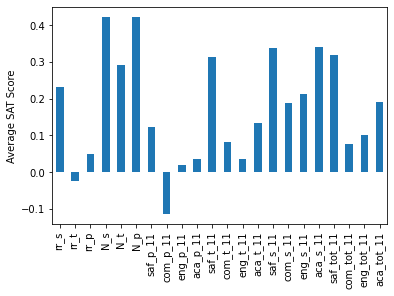

In [58]:
#Make a bar plot of the correlations between surveys and sat_score
combined.corr()["sat_score"][survey_fields].plot.bar()
plt.ylabel('Average SAT Score')

There are high correlations between **N_s** (number of student respondents), **N_t** (number of teacher respondents), **N_p** (number of parent respondents) and **sat_score**. We can also see that students' and teachers' perceptions of safety ("saf_s_11" & "saf_t_11") correlate well with the SAT scores. Let's plot a scatter plot below to investigate further.


Text(0, 0.5, 'Average Total SAT Score per school')

<Figure size 432x288 with 0 Axes>

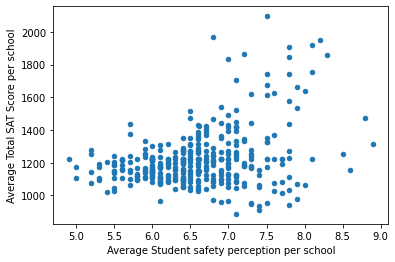

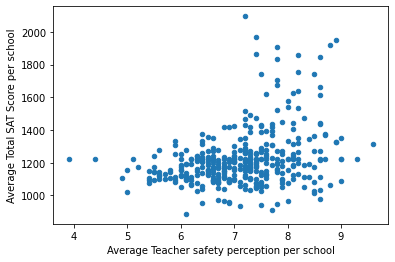

In [56]:
# Plot student safety perception
combined.plot.scatter(x='saf_s_11', y='sat_score')
plt.xlabel('Average Student safety perception per school')
plt.ylabel('Average Total SAT Score per school')

# Plot teacher safety perception
combined.plot.scatter(x='saf_t_11', y='sat_score')
plt.xlabel('Average Teacher safety perception per school')
plt.ylabel('Average Total SAT Score per school')

In [74]:
# Let's print the correlation coefficients for both plots
print('Correlation between SAT Scores and student safety perceptions is {}'.format(correlations['saf_s_11']))
print('Correlation between SAT Scores and teacher safety perceptions is {}'.format(correlations['saf_t_11']))

Correlation between SAT Scores and student safety perceptions is 0.3376387443608812
Correlation between SAT Scores and teacher safety perceptions is 0.31381033335201036


Both scatter plots suggest that there is indeed a moderate correlation between safety and  SAT scores. 

# Investigating the correlation between academic standards perception and SAT scores

As before, let's plot two scatter plots to visualise the relationship between academic standards perception and the average SAT scores in NYC high schools.

Text(0, 0.5, 'Average Total SAT Score per school')

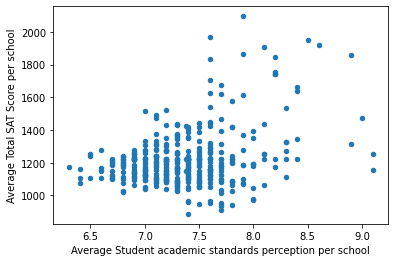

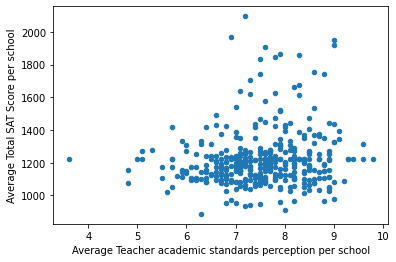

In [70]:
# Plot student academic standards perception
combined.plot.scatter(x='aca_s_11', y='sat_score')
plt.xlabel('Average Student academic standards perception per school')
plt.ylabel('Average Total SAT Score per school')

# Plot teacher academic standards perception
combined.plot.scatter(x='aca_t_11', y='sat_score')
plt.xlabel('Average Teacher academic standards perception per school')
plt.ylabel('Average Total SAT Score per school')

In [75]:
# Let's print the correlation coefficients for both plots
print('Correlation between SAT Scores and student academic standards perceptions is {}'.format(correlations['aca_s_11']))
print('Correlation between SAT Scores and teacher academic standards perceptions is {}'.format(correlations['aca_t_11']))

Correlation between SAT Scores and student academic standards perceptions is 0.3394354735422532
Correlation between SAT Scores and teacher academic standards perceptions is 0.13234766778256465


It is intersting that student academic standards perceptions correlate with SAT scores, but this is not true for teacher academic standards perceptions. One reason may be that students can assess their school's academic standards with less bias than teachers.

# Investigating Racial Differences in SAT Scores

Text(0, 0.5, 'Average SAT Score')

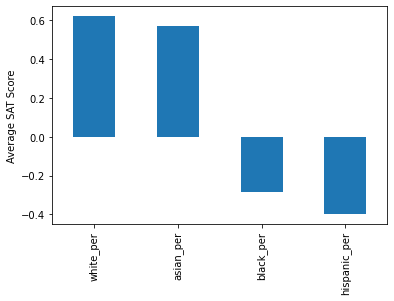

In [57]:
# Choose the columns in the combined dataframe that contain students' racial information and plot barplots of these columns' correlations with the SAT scores
races = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
combined.corr()['sat_score'][races].plot.bar()
plt.ylabel('Average SAT Score')

We can clearly see that white and asian races have much stronger correlations with SAT scores then black and hispanic. This might be due to schools with higher percentage of hispanic or black students having worse facilities or being located  in poorer boroughs of New York City. To check this claim, let's plot a scatter plot to have a better look at the correlation of percentage of hispanic students with SAT scores.

Text(0.5, 0, 'Percentage of hispanic students')

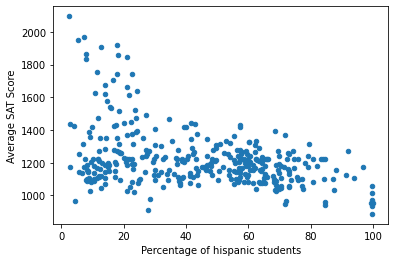

In [64]:
combined.plot.scatter(x='hispanic_per', y='sat_score')
plt.ylabel('Average SAT Score')
plt.xlabel('Percentage of hispanic students')

In [76]:
# Let's print the correlation coefficients for the plot
print('Correlation between SAT Scores and percentage of hispanic students is {}'.format(correlations['hispanic_per']))

Correlation between SAT Scores and percentage of hispanic students is -0.39698493078147196


From the plot above, we can see there some schools with low SAT scores, where nearly all of the students are hispanic. Let's filter out these schools and find some information about them on Google.

In [61]:
print(combined['SchoolName'][combined['hispanic_per']>95])

44             Manhattan Bridges High School
82                                         0
89            GREGORIO LUPERON HS SCI & MATH
125      Academy for Language and Technology
141    International School for Liberal Arts
176                                        0
253                Multicultural High School
286                                        0
Name: SchoolName, dtype: object


These schools appear to primarily admit students who are recent immigrants to the US. A lot of such students are non-native English speakers, which explains the lower SAT scores. However, our previous claim about the schools' geographic locations is not necessarily correct as the schools do not all belong to the same part(s) of the city.

# Investigating gender differences in SAT scores

Text(0, 0.5, 'Average SAT Score')

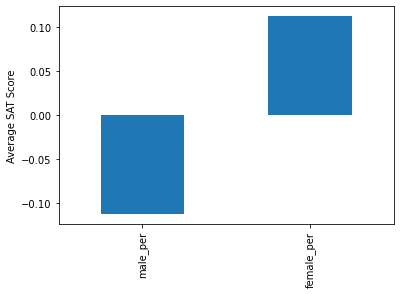

In [63]:
# Choose columns that correspond to genders and plot bar plots of their correlations with SAT scores
genders = ['male_per', 'female_per']
combined.corr()['sat_score'][genders].plot.bar()
plt.ylabel('Average SAT Score')

Both male percentage and female percentage of students in a school have weak correlations with SAT scores. However, female percentage has positive correlation and male percentage has negative correlation. This suggests to some extent that the higher the SAT in a school, the smaller is the percentage of male students in that school.

Let's investigate schools with high SAT scores and a high female percentage. First, let's plot a scatter plot.

Text(0.5, 0, 'Percentage of female students')

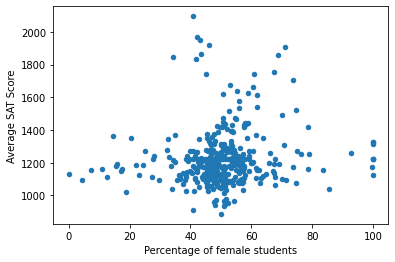

In [65]:
combined.plot.scatter(x='female_per', y='sat_score')
plt.ylabel('Average SAT Score')
plt.xlabel('Percentage of female students')

In [77]:
# Let's print the correlation coefficients for the plot
print('Correlation between SAT Scores and percentage of female students is {}'.format(correlations['female_per']))

Correlation between SAT Scores and percentage of female students is 0.11210773942203284


The scatter plot shows weak correlation between the two variables. We see that our previous claim is not necessarily correct since schools with high female percentages (>60%) are performing on the same level as those with lower percentages. What is interesting is that there is a cluster of schools that have high SAT scores with female percentages of around 60% - 80%. Let's look at their names and research them online, as before.

In [67]:
combined[['SchoolName','female_per']][(combined['female_per'] > 60) & (combined['sat_score'] > 1700)].head()

,SchoolName,female_per
5,0,68.7
26,Eleanor Roosevelt High School,67.5
60,BEACON SCHOOL,61.0
61,FIORELLO H.LAGUARDIA HS,73.6
302,TOWNSEND HARRIS HS,71.1


These schools appear to be very selective liberal arts schools that have high academic standards. This explains why they have higher SAT scores.

# Investigating the correlation between AP Test Takers and SAT Scores

Text(0, 0.5, 'Average SAT Score')

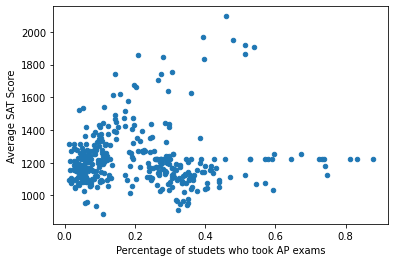

In [79]:
# First, calculate the percentage of students in each school that took an AP exam and create a new "ap_per" column that contains this data
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']
combined.plot.scatter(x='ap_per', y='sat_score')
plt.xlabel('Percentage of studets who took AP exams')
plt.ylabel('Average SAT Score')

One would expect the two variables to hava strong correlation, since students taking AP exams are likely to study more and hence perform better at the SAT tests. Hovewer, we observe weak correlation.

# Conclusion

In this project, we have cleaned the initial datasets and combined them into a single dataframe that made the analysis of the data much easier. We have then looked at some correlations between student and teacher surveys with SAT scores. Our findings were that there is some correlation between safety perception and SAT scores, and while there is good correlation between student academic standards perception and SAT scores, the correlation between teacher academic standards perception and SAT scores is much weaker.

Then, the differences in SAT scores for different student genders and races were examined. It was found that correlation between white and asian student percentages and SAT scores is much stronger than that between black and hispanic students and SAT scores. In terms of gender, both male and female student percentages correlated weekly with SAT scores. Finally, a relationship between AP exams takers and SAT scores was tested. Again, correlation betweem the two was found to be weak.